In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
#df1=pd.read_csv("date-hour-soo-dest-2019.csv")
df=pd.read_csv("date-hour-soo-dest-2020.csv")
#df=pd.concat([df1,df2],ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811863 entries, 0 to 5811862
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Date                 object
 1   Hour                 int64 
 2   Origin Station       object
 3   Destination Station  object
 4   Trip Count           int64 
dtypes: int64(2), object(3)
memory usage: 221.7+ MB


In [ ]:
#datetime operations

df['Date']=pd.to_datetime(df['Date'])
df['day']=df['Date'].dt.dayofweek
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year
df['weekday']=df['Date'].dt.day_name()
df['month_name']=df['Date'].dt.month_name()
df=df.drop('Date',axis=1)

In [ ]:
df.head(30)

,Hour,Origin Station,Destination Station,Trip Count,day,month,year,weekday,month_name
0,0,12TH,16TH,5,2,1,2020,Wednesday,January
1,0,12TH,24TH,3,2,1,2020,Wednesday,January
2,0,12TH,ASHB,6,2,1,2020,Wednesday,January
3,0,12TH,BAYF,1,2,1,2020,Wednesday,January
4,0,12TH,CIVC,3,2,1,2020,Wednesday,January
5,0,12TH,COLS,2,2,1,2020,Wednesday,January
6,0,12TH,DALY,1,2,1,2020,Wednesday,January
7,0,12TH,DBRK,1,2,1,2020,Wednesday,January
8,0,12TH,DELN,2,2,1,2020,Wednesday,January
9,0,12TH,EMBR,3,2,1,2020,Wednesday,January


In [ ]:
df.isnull().sum()

Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
day                    0
month                  0
year                   0
weekday                0
month_name             0
dtype: int64

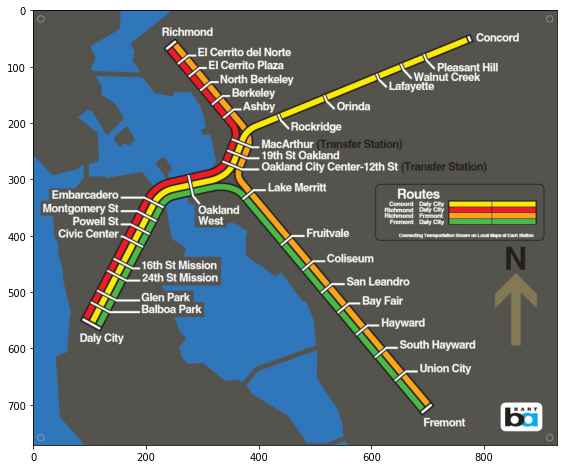

In [ ]:
plt.figure(figsize=(12,8))
img=plt.imread('maps4.jpg')
plt.imshow(img)
plt.show()

**Data Analytics Questions**

Which BART station is the busiest?

What is the least popular BART route?

When is the best time to go to SF from Berkeley if you want to find a seat?

Which day of the week is the busiest?

How many people take the BART late at night? 

*There is not passanger counts information.*

In [ ]:
df['Origin Station'].value_counts()

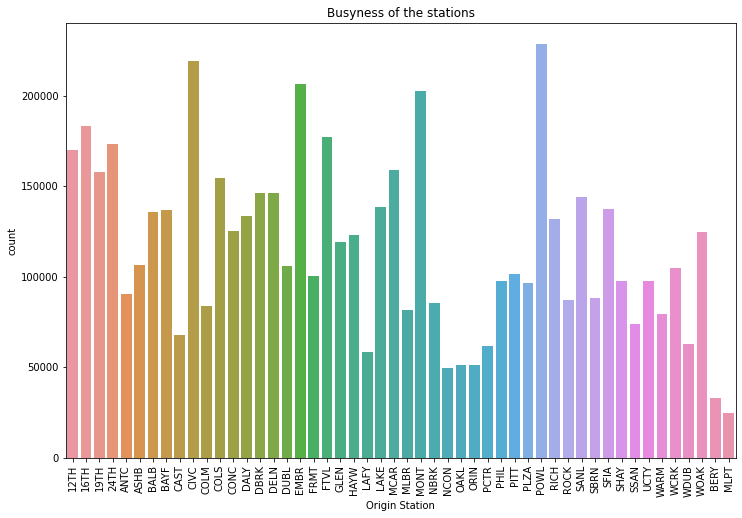

In [ ]:
fig=plt.figure(figsize=(12,8))

ax=sns.countplot(df['Origin Station'])
ax.set_title('Busyness of the stations')
ax.set_xlabel('Origin Station')
plt.xticks(rotation=90);

In [ ]:
#Busiest station is POWL on both origin and destination routes.
#Least popular station is MLPT on both origin and destination routes.

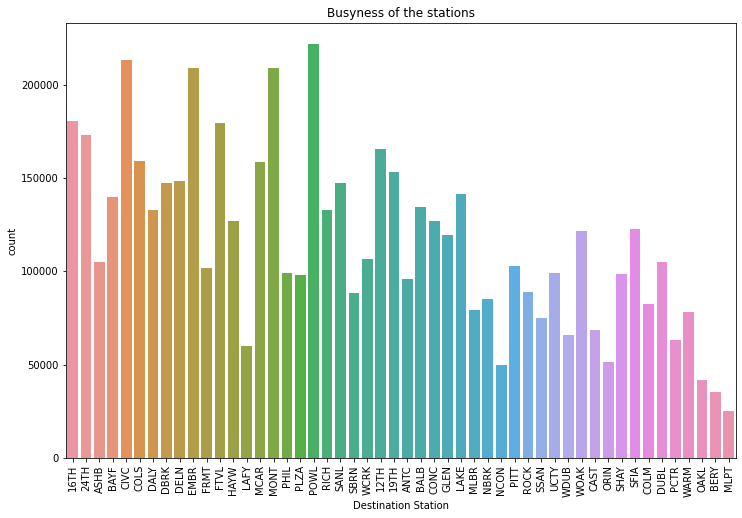

In [ ]:
fig=plt.figure(figsize=(12,8))

ax=sns.countplot(df['Destination Station'])
ax.set_title('Busyness of the stations')
ax.set_xlabel('Destination Station')
plt.xticks(rotation=90);

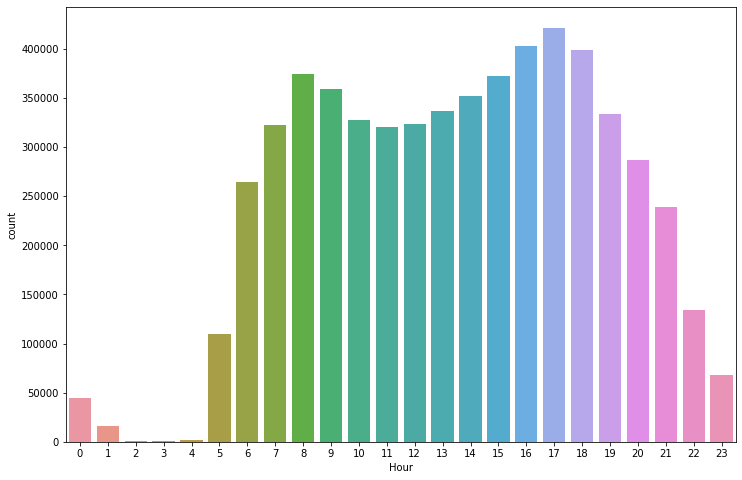

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.countplot(df['Hour']);

In [ ]:
#Generally busiest hours range is 16-17-18.

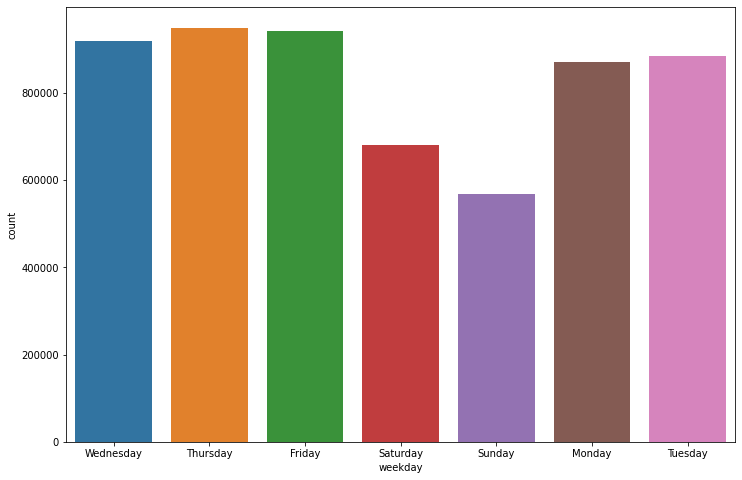

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.countplot(df['weekday']);

In [ ]:
#Generally busiest days are Thursday and Friday.

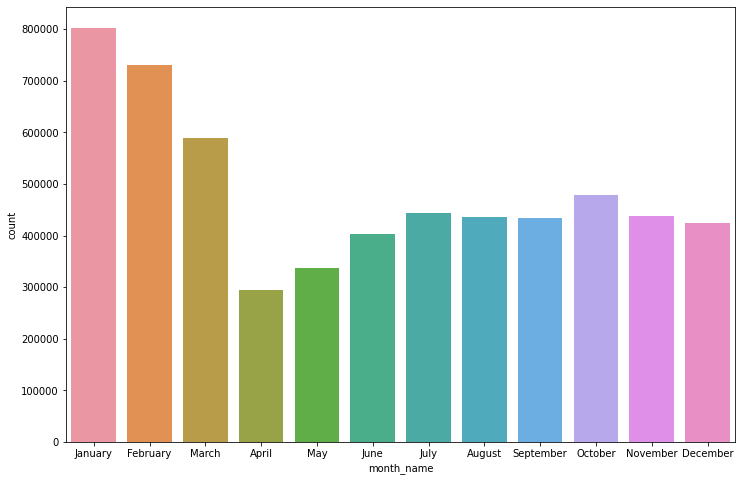

In [ ]:
fig=plt.figure(figsize=(12,8))
sns.countplot(df['month_name']);

In [ ]:
# The busiest month of the 2020 is january.

In [ ]:
df.head()

,Hour,Origin Station,Destination Station,Trip Count,day,month,year,weekday,month_name
0,0,12TH,16TH,5,2,1,2020,Wednesday,January
1,0,12TH,24TH,3,2,1,2020,Wednesday,January
2,0,12TH,ASHB,6,2,1,2020,Wednesday,January
3,0,12TH,BAYF,1,2,1,2020,Wednesday,January
4,0,12TH,CIVC,3,2,1,2020,Wednesday,January


In [ ]:
df.groupby("Origin Station")["Trip Count"].sum().sort_values(ascending=False).head()

Origin Station
MONT    2575894
EMBR    2522914
POWL    2458398
CIVC    1982837
16TH    1113391
Name: Trip Count, dtype: int64

In [139]:
df["Origin Station"].value_counts()

POWL    228578
CIVC    219160
EMBR    206637
MONT    202319
16TH    183182
FTVL    176850
24TH    173518
12TH    169909
MCAR    158738
19TH    157526
COLS    154693
DELN    146136
DBRK    145980
SANL    144048
LAKE    138577
SFIA    137165
BAYF    136738
BALB    135481
DALY    133553
RICH    131998
CONC    124987
WOAK    124582
HAYW    122973
GLEN    119373
ASHB    106501
DUBL    105822
WCRK    104990
PITT    101765
FRMT    100394
SHAY     97713
UCTY     97641
PHIL     97518
PLZA     96762
ANTC     90682
SBRN     88266
ROCK     87151
NBRK     85352
COLM     83711
MLBR     81410
WARM     79171
SSAN     73856
CAST     67659
WDUB     62707
PCTR     61970
LAFY     58445
OAKL     51445
ORIN     51012
NCON     49385
BERY     33044
MLPT     24790
Name: Origin Station, dtype: int64

In [142]:
#trip=df.groupby("Origin Station")["Trip Count"].sum().sort_values(ascending=False)

In [143]:
#freq=df["Origin Station"].value_counts()

In [ ]:
#(trip*freq).to_frame()

In [157]:
rich_to_daly = df.loc[(df["Origin Station"]== "RICH") & (df["Destination Station"]=="DALY")]

In [161]:
rich_to_daly.sample()

,Hour,Origin Station,Destination Station,Trip Count,day,month,year,weekday,month_name,stations_trip
813894,13,RICH,DALY,1,5,2,2020,Saturday,February,NaN


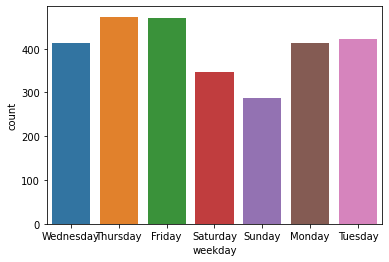

In [163]:
sns.countplot(rich_to_daly["weekday"]) #the best time to going to richmont to daly station is on sunday.

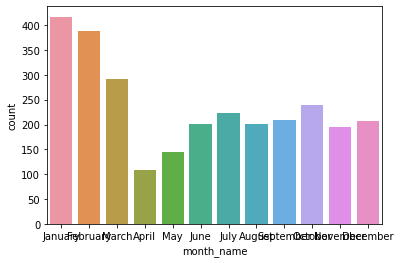

In [164]:
sns.countplot(rich_to_daly["month_name"]) #the best time to going to richmont to daly station is on april.

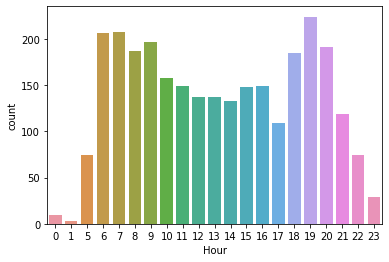

In [166]:
sns.countplot(rich_to_daly["Hour"]) #the best time to going to richmont to daly station is between at 9pm and 5am.

**Data Science Questions**

**Question A**: Compute the straight line distance between every station

**Question B**: Build a model that can predicted the number of people commuting to
work by Bart between any 2 stations:

How would you approach that?

***If I know the number of passenger on each stations daily or max passenger on a train,I can predict the total passengers according to freq of the station in this data and trip counts of them.***

What additional data would you need?
 
***I need passenger data.At least number of maximum passenger on a train.***

How would you want the city or Bart officials to use your data?

***They can use the predictions to take some precautions of security,	human-resource allocation and to seting the trip number of a train efficiently.***


In [185]:
station_coords=pd.read_csv("station_coords.csv",sep=";")

In [186]:
station_coords.sample(4)  

,station_name,latitute,longitude
12,COLM,301,1154
47,PLZA,673,407
33,WCRK,1135,394
39,ANTC,1855,187


In [187]:
station_coords.columns=["Origin Station","o_latitute","o_longitude"]
df=pd.merge(df,station_coords)
station_coords.columns=["Destination Station","d_latitute","d_longitude"]
df=pd.merge(df,station_coords)
df=df.drop_duplicates()
R = 6373.0 #km cinsinden yaklaşık dünyanın yarıçapı
lat1=df["o_latitute"]
lon1=df["o_longitude"]
lat2=df["d_latitute"]
lon2=df["d_longitude"]

dlon=(lon2-lon1).astype(float)
dlat=(lat2-lat1).astype(float)

a=np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c
df["distance"]=distance
df_distance_table=df[["Origin Station","Destination Station","distance"]].drop_duplicates().reset_index(drop=True)
df_distance_table=df_distance_table[df_distance_table["distance"]!=0]

In [188]:
df_distance_table

,Origin Station,Destination Station,distance
0,12TH,16TH,11737.551948
2,19TH,16TH,8451.157261
3,24TH,16TH,7400.362318
4,ANTC,16TH,17817.044376
5,ASHB,16TH,2559.056745
...,...,...,...
2494,WARM,MLPT,9475.152266
2495,WCRK,MLPT,4132.865905
2496,WDUB,MLPT,7389.668840
2497,WOAK,MLPT,12101.946570
